<a href="https://colab.research.google.com/github/Flower1311/mt/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Trade_Python_NN_1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [10]:
import time

In [11]:
data = pd.read_csv("https://raw.githubusercontent.com/Flower1311/mt/main/mm.csv", sep=',')



In [12]:
data.shape
data

,Year,Inflation
0,1991,4.80
1,1991,6.30
2,1991,63.50
3,1991,3.00
4,1991,1.20
...,...,...
340,2021,0.96
341,2021,0.82
342,2022,1.17
343,2022,7.61


In [13]:
data = data.reset_index()

In [14]:
data

,index,Year,Inflation
0,0,1991,4.80
1,1,1991,6.30
2,2,1991,63.50
3,3,1991,3.00
4,4,1991,1.20
...,...,...,...
340,340,2021,0.96
341,341,2021,0.82
342,342,2022,1.17
343,343,2022,7.61


In [15]:
data.columns

Index(['index', 'Year', 'Inflation'], dtype='object')

In [16]:
data

,index,Year,Inflation
0,0,1991,4.80
1,1,1991,6.30
2,2,1991,63.50
3,3,1991,3.00
4,4,1991,1.20
...,...,...,...
340,340,2021,0.96
341,341,2021,0.82
342,342,2022,1.17
343,343,2022,7.61


In [17]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)
  

In [18]:
TRAIN_SPLIT = 20
tf.random.set_seed(13)

In [19]:
uni_data = data['Inflation']
uni_data.index = data['Year']
uni_data.head()

Year
1991     4.8
1991     6.3
1991    63.5
1991     3.0
1991     1.2
Name: Inflation, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9205a5c90>],
      dtype=object)

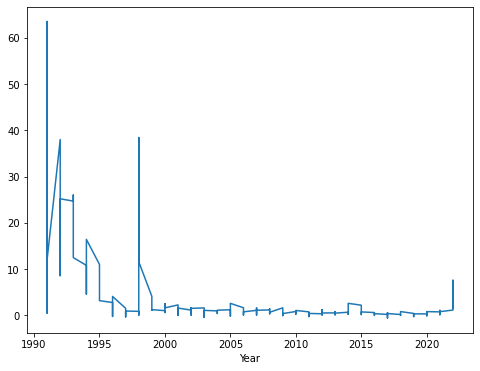

In [20]:
uni_data.plot(subplots=True)

In [21]:
uni_data = uni_data.values

In [22]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

In [23]:
uni_data = (uni_data-uni_train_mean)/uni_train_std
print(uni_data)


[-0.60618113 -0.50718585  3.26783439 -0.72497548 -0.84376982 -0.88336794
 -0.88996762 -0.85036951 -0.69197705 -0.33559402 -0.12440408  1.58491453
  1.05033999  0.50916575 -0.13760345  0.33757393 -0.22339936 -0.35539308
 -0.16400219  0.58836198  0.79955193  0.74015476  0.70715633  0.40357078
  0.31117518  0.27157707  0.39037141  0.55470359  0.79295224  0.59496167
  0.36397267  0.15872244 -0.09800533 -0.20888005 -0.43392934 -0.36265273
 -0.46692777 -0.52698491 -0.5712028  -0.61806057 -0.39763107  0.06698681
  0.04124804  0.16202228 -0.19568068 -0.33295415 -0.36397267 -0.39961097
 -0.48342698 -0.56790296 -0.62202038 -0.62862007 -0.61146088 -0.62202038
 -0.71177611 -0.73817485 -0.78041284 -0.81737108 -0.84574973 -0.87544831
 -0.93682539 -0.90118709 -0.84376982 -0.79889196 -0.82925051 -0.65171897
 -0.82133089 -0.82859054 -0.85960907 -0.860929   -0.85036951 -0.86158897
 -0.93220561 -0.94276511 -0.91174658 -0.88270797 -0.85960907 -0.86422885
 -0.88072806 -0.89788724 -0.88996762 -0.9176863  -0

In [24]:
univariate_past_history = 18
univariate_future_target = 0
x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target inflation to predict')
print (y_train_uni[0])

Single window of past history
[[-0.60618113]
 [-0.50718585]
 [ 3.26783439]
 [-0.72497548]
 [-0.84376982]
 [-0.88336794]
 [-0.88996762]
 [-0.85036951]
 [-0.69197705]
 [-0.33559402]
 [-0.12440408]
 [ 1.58491453]
 [ 1.05033999]
 [ 0.50916575]
 [-0.13760345]
 [ 0.33757393]
 [-0.22339936]
 [-0.35539308]]

 Target inflation to predict
-0.16400219057382082


In [25]:
def create_time_steps(length):
  return list(range(-length, 0))

In [26]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

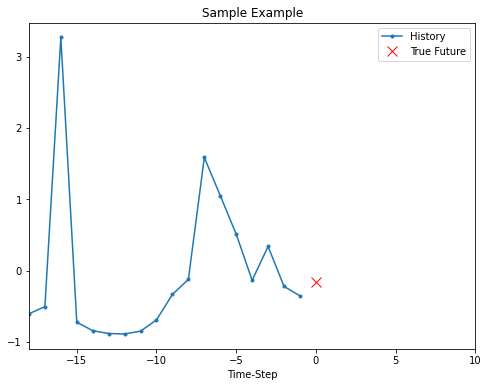

In [27]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [28]:
def baseline(history):
  return np.mean(history)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

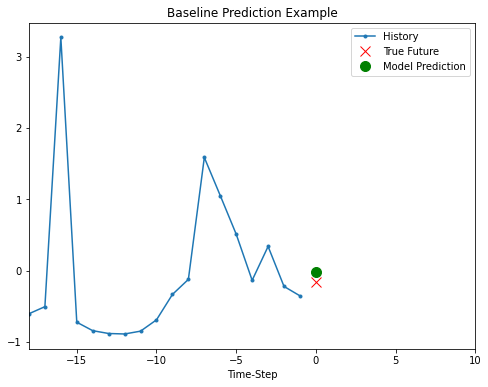

In [107]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')


In [30]:
BATCH_SIZE = 10
BUFFER_SIZE = 30000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [88]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [89]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

(10, 1)


In [90]:
print(x_train_uni.shape)

(2, 18, 1)


In [91]:
EVALUATION_INTERVAL =200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)


Epoch 1/10
200/200 [==============================] - 6s 13ms/step - loss: 0.2228 - val_loss: 1.2594
Epoch 2/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0191 - val_loss: 1.2560
Epoch 3/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0185 - val_loss: 1.2522
Epoch 4/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0175 - val_loss: 1.2490
Epoch 5/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0161 - val_loss: 1.2437
Epoch 6/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0160 - val_loss: 1.2466
Epoch 7/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0150 - val_loss: 1.2456
Epoch 8/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0154 - val_loss: 1.2455
Epoch 9/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0150 - val_loss: 1.2449
Epoch 10/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0135 - val_loss: 1.244

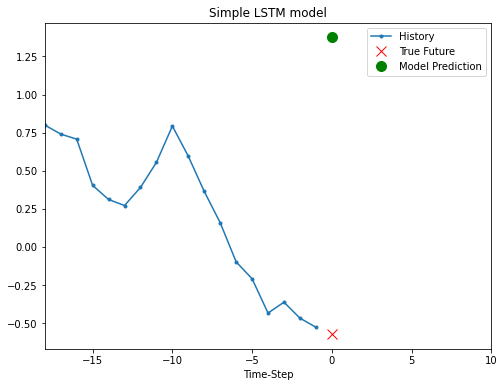

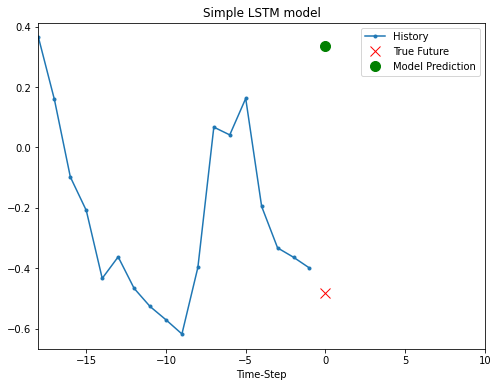

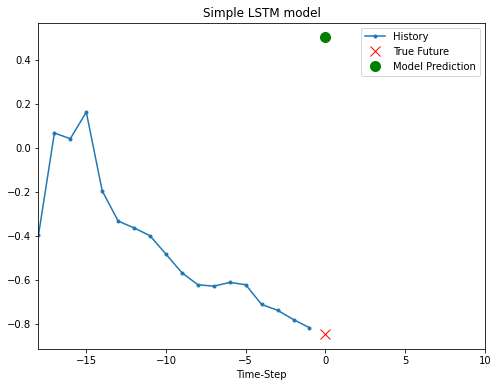

In [116]:
for x, y in val_univariate.take(3):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  
  plot.show()
 

In [115]:
actual_predictions = simple_lstm_model.predict(x)[-TRAIN_SPLIT:].mean()
actual_predictions_std= simple_lstm_model.predict(x)[-TRAIN_SPLIT:].std()
s = (simple_lstm_model.predict(x)-actual_predictions)/actual_predictions_std
print(s)


[[ 1.3348094 ]
 [ 1.1634434 ]
 [ 0.94326764]
 [ 0.7023231 ]
 [ 0.33594796]
 [-0.11207619]
 [-0.59520036]
 [-0.9322044 ]
 [-1.1973405 ]
 [-1.6429715 ]]


ValueError: ignored

In [36]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [37]:
past_history = 
future_target = 
STEP = 1

x_train_single, y_train_single = multivariate_data(uni_data, uni_data[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(uni_data, uni_data[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

SyntaxError: ignored

In [ ]:
def compile_and_fit(model, train_ds, val_ds, num_epochs: int = 20): #принимает модель, тренировочный датасет, валидационный датасет и кол. эпох для тренировки
  model.compile(                              #сперва модель компилируется
      loss=tf.losses.MeanSquaredError(),      #передаем функцию потерь, исп. для обучения - Это регресия - предск. вещ. числа - для этой задачи исп. MeanSquaredError
      optimizer=tf.optimizers.Adam(),         #передаем функцию оптимизации, кот. используется для оптимизации функции потерь
      metrics=[tf.metrics.MeanAbsoluteError()]    #передается массив метрик, для просмотра как происходит обучение, как наши метрики меняются - растут/уменьшаются или остаются на месте
  )
  history = model.fit(                        #здесь происходит обучение
      train_ds,                               #передаем тренировочный датасет, на котором будет происходить обучение
      epochs=num_epochs,                      #кол. эпох - сколько раз полностью пройдемся по всему тренировочному датасету - сколько раз мы используем все семплы из тренировочного датасета для обучения
      validation_data=val_ds,                 #передаем те данные, по которым можно расчитывать валидационные метрики - на которых можно понять наша модель переобучается или нет
      verbose=0                               #выводить ли промежуточную информацию во время обучения
  )
  return history                              #объект с помощью которого можно напечатать значения метрик во время эпох

In [ ]:
start_time = time.time()
lstm_model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(32, return_sequences=False),
  tf.keras.layers.Dense(1)
])
history = compile_and_fit(lstm_model, train_ds, val_ds, num_epochs=100)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
plt.plot(history.history['mean_absolute_error'])

In [ ]:
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
lstm_model.evaluate(train_ds)

In [ ]:
lstm_model.evaluate(val_ds)

In [ ]:
start_time = time.time()
lstm_model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(32, return_sequences=False),
  tf.keras.layers.Dense(1)
])
history = compile_and_fit(lstm_model, train_ds, val_ds, num_epochs=500)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
lstm_model.evaluate(train_ds)

In [ ]:
lstm_model.evaluate(val_ds)

In [ ]:
plt.plot(history.history['mean_absolute_error'])

In [ ]:
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
start_time = time.time()
lstm_model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(32, return_sequences=False),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1)
])
history = compile_and_fit(lstm_model, train_ds, val_ds, num_epochs=500)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
lstm_model.evaluate(train_ds)

In [ ]:
lstm_model.evaluate(val_ds)

In [ ]:
plt.plot(history.history['mean_absolute_error'])

In [ ]:
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

# show actions (dividends, splits)
msft.actions

# show dividends
msft.dividends

# show splits
msft.splits

# show financials
msft.financials
msft.quarterly_financials

# show major holders
msft.major_holders

# show institutional holders
msft.institutional_holders

# show balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet

# show cashflow
msft.cashflow
msft.quarterly_cashflow

# show earnings
msft.earnings
msft.quarterly_earnings

# show sustainability
msft.sustainability

# show analysts recommendations
msft.recommendations

# show next event (earnings, etc)
msft.calendar

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# get option chain for specific expiration
#opt = msft.option_chain('YYYY-MM-DD')
# data available via: opt.calls, opt.puts

In [ ]:
# get stock info
msft.info

In [ ]:
# get historical market data
hist = msft.history(period="max")

In [ ]:
# show actions (dividends, splits)
msft.actions

In [ ]:
# show dividends
msft.dividends

In [ ]:
# show splits
msft.splits

In [ ]:
# show financials
msft.financials
msft.quarterly_financials